In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [28]:
# 1. Carregar o dataset aac_intakes_outcomes.csv (substitua pelo caminho correto no Colab)
df = pd.read_csv('/content/aac_intakes_outcomes.csv', on_bad_lines='skip')

In [29]:
# 2. Limpeza e preparação dos dados
# Remover colunas irrelevantes
df = df.drop(columns=['animal_id_outcome', 'outcome_subtype', 'outcome_datetime', 'found_location',
                      'outcome_monthyear', 'date_of_birth', 'dob_monthyear', 'intake_datetime', 'intake_monthyear'])
df.head()

,age_upon_outcome,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_weekday,outcome_hour,...,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",12,2017,Thursday,0,...,3650,10.0,"(7.5, 10.0]",12,2017,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",12,2014,Saturday,16,...,2555,7.0,"(5.0, 7.5]",12,2014,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",3,2014,Saturday,17,...,2190,6.0,"(5.0, 7.5]",3,2014,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",4,2014,Monday,15,...,3650,10.0,"(7.5, 10.0]",4,2014,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",11,2013,Saturday,11,...,5840,16.0,"(15.0, 17.5]",11,2013,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [30]:
# Criando a variável alvo: 'adopted'
df['adopted'] = df['outcome_type'].apply(lambda x: 1 if x == 'Adoption' else 0)

# 3. Selecionar colunas de interesse e remover valores nulos
selected_columns = ['age_upon_intake_(years)', 'intake_condition', 'animal_type', 'breed',
                    'color', 'sex_upon_intake', 'time_in_shelter_days', 'intake_type', 'adopted']
df = df[selected_columns]
df = df.dropna()
df.head()

,age_upon_intake_(years),intake_condition,animal_type,breed,color,sex_upon_intake,time_in_shelter_days,intake_type,adopted
0,10.0,Normal,Dog,Spinone Italiano Mix,Yellow/White,Neutered Male,0.588194,Stray,0
1,7.0,Normal,Dog,Spinone Italiano Mix,Yellow/White,Neutered Male,1.259722,Public Assist,0
2,6.0,Normal,Dog,Spinone Italiano Mix,Yellow/White,Neutered Male,1.113889,Public Assist,0
3,10.0,Normal,Dog,Dachshund,Tricolor,Neutered Male,4.970139,Owner Surrender,0
4,16.0,Injured,Dog,Shetland Sheepdog,Brown/White,Neutered Male,0.119444,Public Assist,0


In [7]:
# 4. Convertendo variáveis categóricas em variáveis numéricas
df = pd.get_dummies(df, columns=['intake_condition', 'animal_type', 'breed', 'color', 'sex_upon_intake'], drop_first=True)


In [8]:
# 5. Separando as variáveis preditoras (X) e a variável alvo (y)
X = df.drop(columns=['adopted'])
y = df['adopted']

In [9]:
# 6. Dividindo o conjunto de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# 7. Lidar com o desequilíbrio de classes usando SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [11]:
# 8. Treinamento do modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [12]:
# 9. Fazendo predições no conjunto de teste
y_pred_rf = model_rf.predict(x_test)

In [13]:
# 10. Avaliação do modelo
print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))


Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     13754
           1       0.59      0.62      0.61     10148

    accuracy                           0.66     23902
   macro avg       0.65      0.65      0.65     23902
weighted avg       0.66      0.66      0.66     23902



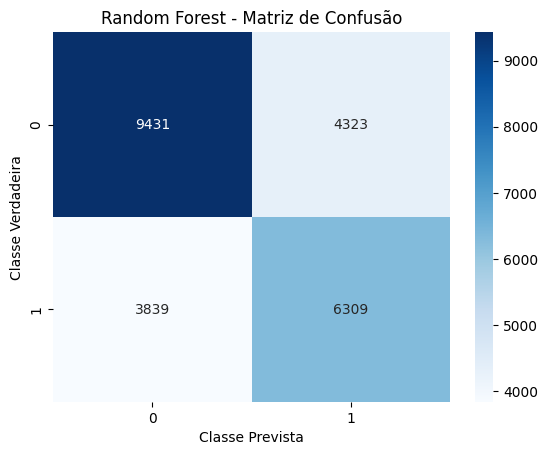

In [14]:
# 11. Exibindo a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()

In [15]:
# 12. Exibindo a acurácia do modelo
print("Acurácia - Random Forest:", accuracy_score(y_test, y_pred_rf))

Acurácia - Random Forest: 0.6585222993891725



Importância das Variáveis no Modelo Random Forest:
1. age_upon_intake_(years) (0.3370)
2. sex_upon_intake_Unknown (0.0566)
3. intake_condition_Normal (0.0218)
4. sex_upon_intake_Intact Male (0.0207)
5. sex_upon_intake_Neutered Male (0.0155)
6. sex_upon_intake_Spayed Female (0.0139)
7. animal_type_Other (0.0121)
8. color_Brown (0.0077)
9. color_Black/White (0.0070)
10. intake_condition_Sick (0.0068)
11. color_Black (0.0067)
12. breed_Pit Bull Mix (0.0063)
13. intake_condition_Injured (0.0063)
14. animal_type_Dog (0.0060)
15. breed_Chihuahua Shorthair Mix (0.0056)
16. color_Brown/White (0.0054)
17. color_White/Black (0.0053)
18. breed_Labrador Retriever Mix (0.0053)
19. color_White (0.0051)
20. breed_Bat Mix (0.0049)
21. color_Tan/White (0.0048)
22. color_White/Brown (0.0047)
23. breed_Domestic Shorthair Mix (0.0045)
24. color_Tricolor (0.0042)
25. breed_German Shepherd Mix (0.0041)
26. color_Black/Brown (0.0040)
27. color_White/Tan (0.0039)
28. color_Blue/White (0.0039)
29. color_Tan (

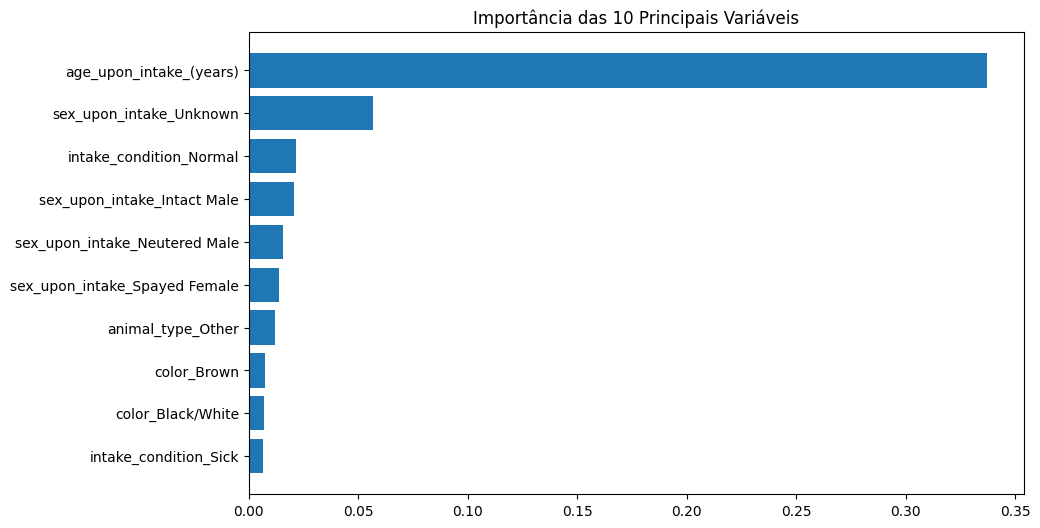

In [16]:
# 13. Exibindo a importância das variáveis (Feature Importance)
importances = model_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]  # Ordenar em ordem decrescente

print("\nImportância das Variáveis no Modelo Random Forest:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]:.4f})")

# Visualizando as 10 variáveis mais importantes
plt.figure(figsize=(10,6))
plt.title("Importância das 10 Principais Variáveis")
plt.barh(range(10), importances[indices[:10]], align="center")
plt.yticks(range(10), [features[i] for i in indices[:10]])
plt.gca().invert_yaxis()
plt.show()